In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.metrics import mean_absolute_error as mae
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('input/CMS_trigger.csv')
parameters = np.array(df.loc[:,'q/pt':])
q_pt = parameters[:,0]
pT = abs(1/q_pt) # GeV
pT_tr, pT_ts, inv_pT_tr, inv_pT_ts = train_test_split(pT, 1/pT, test_size = 0.2, random_state = 1)

In [3]:
pred_fcnn_inv_ptloss = np.array(pd.read_csv('results/fcnn_invpt_ptloss.csv')['0'])
pred_fcnn_pT_ptloss = np.array(pd.read_csv('results/fcnn_pt_ptloss.csv')['0'])
pred_cnn_inv_ptloss = np.array(pd.read_csv('results/cnn_invpt_ptloss.csv')['0'])
pred_cnn_pT_ptloss = np.array(pd.read_csv('results/cnn_pt_ptloss.csv')['0'])
pred_gnn_inv_mse = np.array(pd.read_csv('results/GNN v4 invpt.csv')['0'])
pred_gnn_pT_mse = np.array(pd.read_csv('results/GNN Torch GSoC v5inv_0.csv')['0'])
pred_gnn_inv_ptloss = np.array(pd.read_csv('results/GNN Torch GSoC v6 ptloss inv_1.csv')['0'])
pred_gnn_pT_ptloss = np.array(pd.read_csv('results/GNN Torch GSoC v6 ptloss inv_1.csv')['0'])
print(pred_cnn_pT_ptloss.shape)
print(pred_gnn_inv_mse.shape)

(235872,)
(235872,)


In [51]:
def mae_comp(y_true,y_pred,inv):
    if inv == 1:
        y_true = 1/y_true
        y_pred = 1/y_pred
        
    maex = []
    for i in tqdm(range(2,120),position=0):
        cnd1 = y_true > i-1 
        cnd2 = y_true < i+1
        indices = [j for j in range(len(y_true)) if cnd1[j] and cnd2[j]]
        maex.append(mae(y_true[indices],y_pred[indices]))
    return maex

In [52]:
# MAE

mae_fcnn_inv_ptloss = mae_comp(inv_pT_ts,pred_fcnn_inv_ptloss,1)
mae_fcnn_pT_ptloss = mae_comp(pT_ts,pred_fcnn_pT_ptloss,0)
mae_cnn_inv_ptloss = mae_comp(inv_pT_ts,pred_cnn_inv_ptloss,1)
mae_cnn_pT_ptloss = mae_comp(pT_ts,pred_cnn_pT_ptloss,0)
mae_gnn_inv_mse = mae_comp(inv_pT_ts,pred_gnn_inv_mse,1)
mae_gnn_pT_mse = mae_comp(pT_ts,pred_gnn_pT_mse,0)
mae_gnn_inv_ptloss = mae_comp(inv_pT_ts,pred_gnn_inv_ptloss,1)
mae_gnn_pT_ptloss = mae_comp(pT_ts,pred_gnn_pT_ptloss,0)

pev_axis = np.linspace(0,120,len(mae_fcnn_pT_ptloss)) 

100%|████████████████████████████████████████████████████████████████████████████████| 118/118 [00:01<00:00, 63.05it/s]


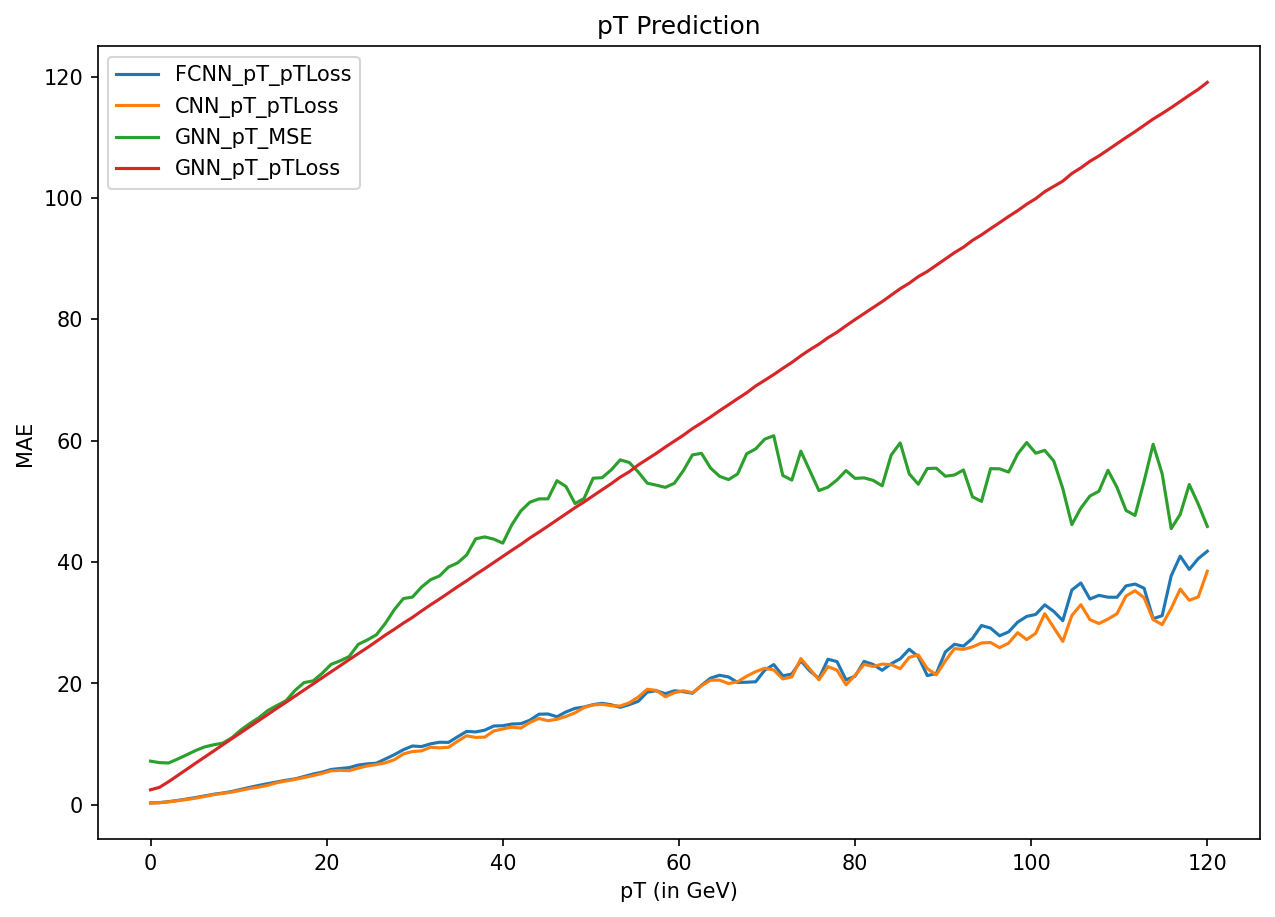

In [54]:
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,mae_fcnn_pT_ptloss, label = 'FCNN_pT_pTLoss')
axs.plot(pev_axis,mae_cnn_pT_ptloss, label = 'CNN_pT_pTLoss')
# axs.plot(pev_axis,mae_fcnn_inv_ptloss, label = 'FCNN_1/pT_pTLoss')
# axs.plot(pev_axis,mae_cnn_inv_ptloss, label = 'CNN_1/pT_pTLoss')
# axs.plot(pev_axis,mae_gnn_inv_mse, label = 'GNN_1/pT_MSE')
axs.plot(pev_axis,mae_gnn_pT_mse, label = 'GNN_pT_MSE')
# axs.plot(pev_axis,mae_gnn_inv_ptloss, label = 'GNN_1/pT_pTLoss')
axs.plot(pev_axis,mae_gnn_pT_ptloss, label = 'GNN_pT_pTLoss')
axs.set_xlabel('pT (in GeV)')
axs.set_ylabel('MAE')
fig.set_dpi(150)
axs.legend()
axs.set_title('pT Prediction')
# axs.set_ylim([-0.01,0.1])

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

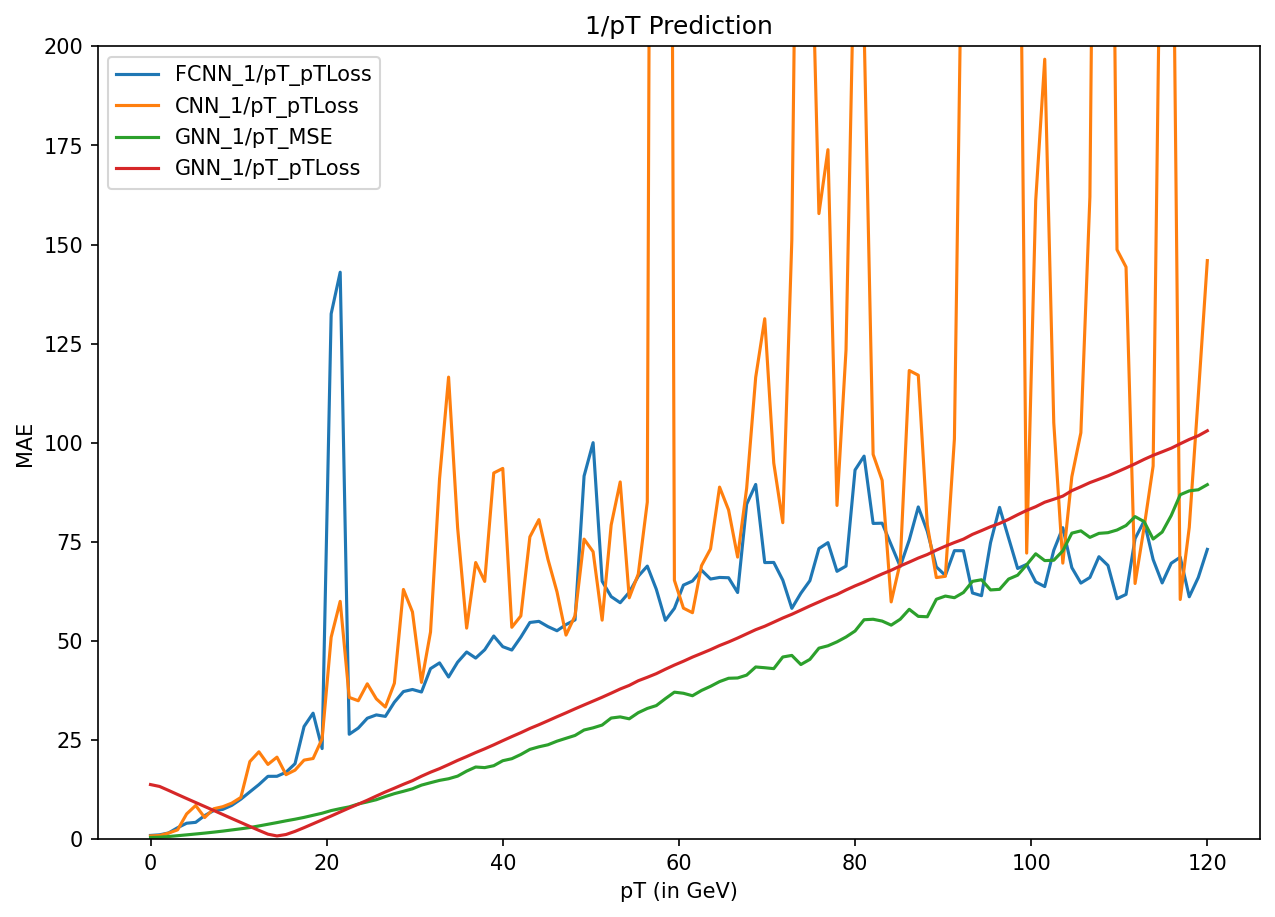

In [61]:
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,mae_fcnn_inv_ptloss, label = 'FCNN_1/pT_pTLoss')
axs.plot(pev_axis,mae_cnn_inv_ptloss, label = 'CNN_1/pT_pTLoss')
axs.plot(pev_axis,mae_gnn_inv_mse, label = 'GNN_1/pT_MSE')
axs.plot(pev_axis,mae_gnn_inv_ptloss, label = 'GNN_1/pT_pTLoss')
axs.set_xlabel('pT (in GeV)')
axs.set_ylabel('MAE')
fig.set_dpi(150)
axs.legend()
axs.set_title('1/pT Prediction')
axs.set_ylim([-0.01,200])

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

In [62]:
def acc_comp(y_true,y_pred,inv):
    if inv == 1:
        y_true = 1/y_true
        y_pred = 1/y_pred
        
    acc = []
    for i in tqdm(range(2,120),position=0):
        grnd = y_true >= i
        pred = y_pred >= i
        cmp = np.sum(np.equal(grnd,np.squeeze(pred))) 
        acc.append(cmp/len(grnd)*100)
    return acc

In [63]:
acc_fcnn_inv_ptloss = acc_comp(inv_pT_ts,pred_fcnn_inv_ptloss,1)
acc_fcnn_pT_ptloss = acc_comp(pT_ts,pred_fcnn_pT_ptloss,0)
acc_cnn_inv_ptloss = acc_comp(inv_pT_ts,pred_cnn_inv_ptloss,1)
acc_cnn_pT_ptloss = acc_comp(pT_ts,pred_cnn_pT_ptloss,0)

acc_gnn_inv_mse = acc_comp(inv_pT_ts,pred_gnn_inv_mse,1)
acc_gnn_pT_mse = acc_comp(pT_ts,pred_gnn_pT_mse,0)
acc_gnn_inv_ptloss = acc_comp(inv_pT_ts,pred_gnn_inv_ptloss,1)
acc_gnn_pT_ptloss = acc_comp(pT_ts,pred_gnn_pT_ptloss,0)

pev_axis = np.linspace(0,120,len(acc_fcnn_inv_ptloss)) 

100%|██████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 2151.16it/s]


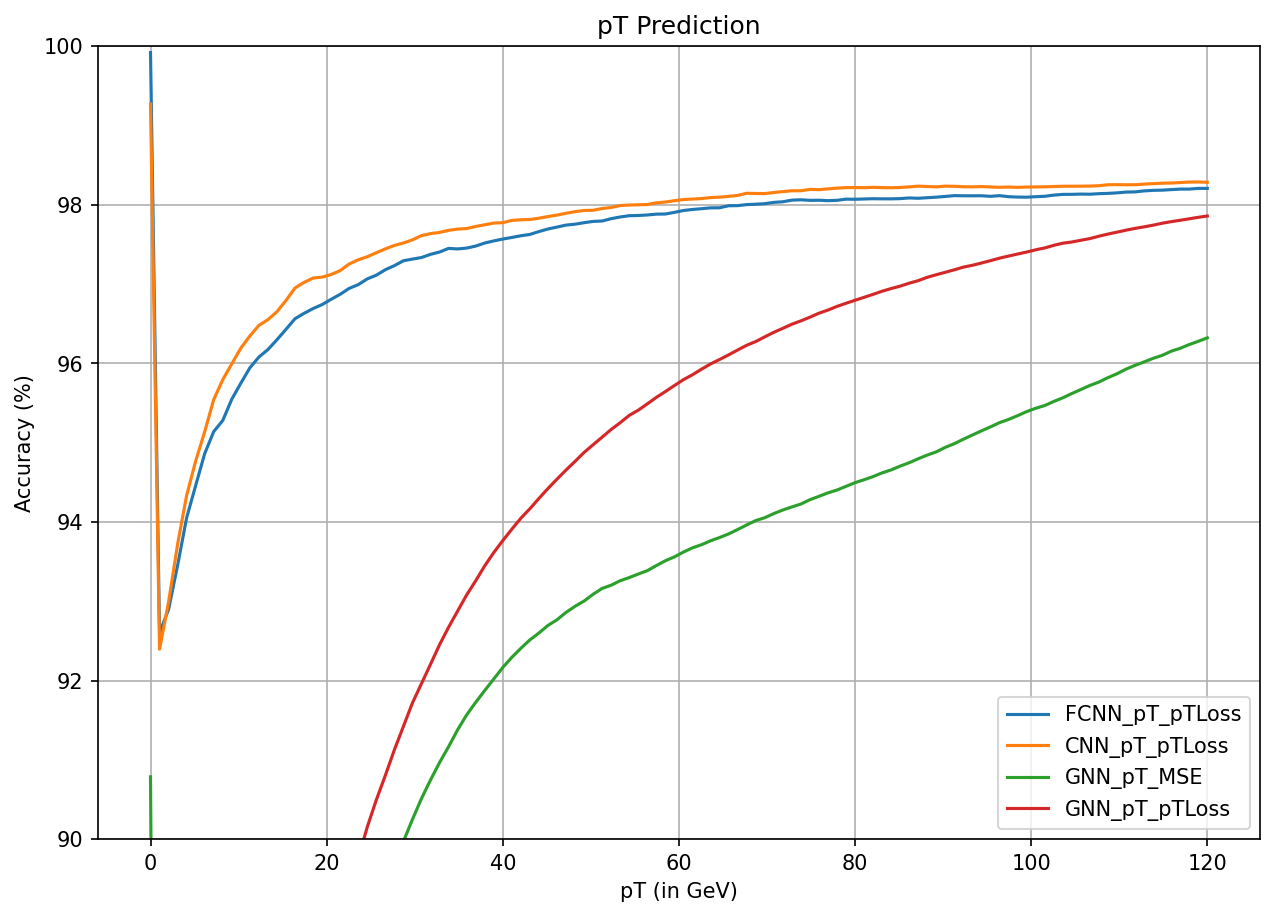

In [64]:
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,acc_fcnn_pT_ptloss, label = 'FCNN_pT_pTLoss')
axs.plot(pev_axis,acc_cnn_pT_ptloss, label = 'CNN_pT_pTLoss')
axs.plot(pev_axis,acc_gnn_pT_mse, label = 'GNN_pT_MSE')
axs.plot(pev_axis,acc_gnn_pT_ptloss, label = 'GNN_pT_pTLoss')
axs.set_xlabel('pT (in GeV)')
axs.set_ylabel('Accuracy (%)')
axs.set_title('pT Prediction')
fig.set_dpi(150)
axs.legend()
axs.grid(which='both')
axs.set_ylim([90,100])

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

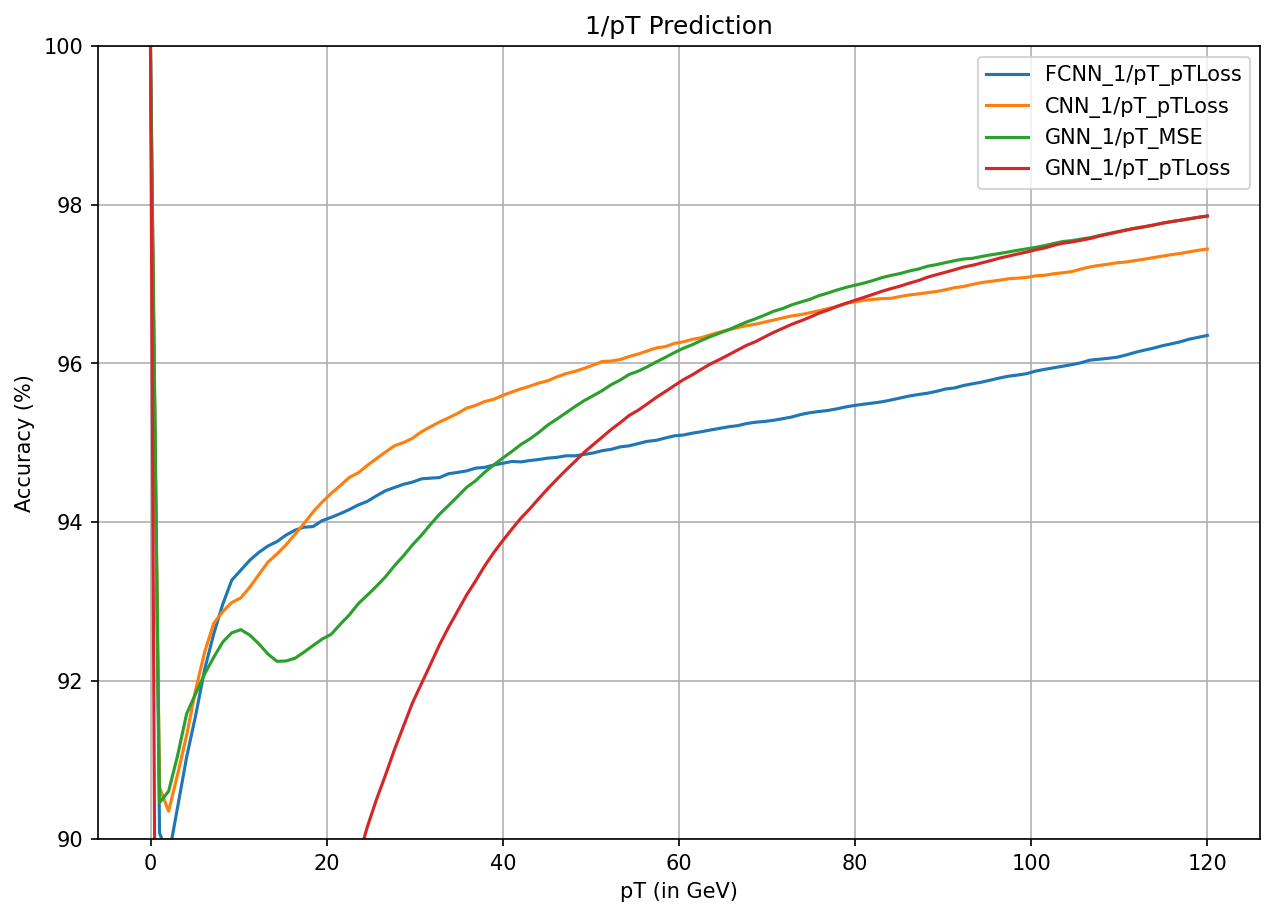

In [65]:
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,acc_fcnn_inv_ptloss, label = 'FCNN_1/pT_pTLoss')
axs.plot(pev_axis,acc_cnn_inv_ptloss, label = 'CNN_1/pT_pTLoss')
axs.plot(pev_axis,acc_gnn_inv_mse, label = 'GNN_1/pT_MSE')
axs.plot(pev_axis,acc_gnn_inv_ptloss, label = 'GNN_1/pT_pTLoss')
axs.set_xlabel('pT (in GeV)')
axs.set_ylabel('Accuracy (%)')
axs.set_title('1/pT Prediction')
fig.set_dpi(150)
axs.legend()
axs.grid(which='both')
axs.set_ylim([90,100])

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

In [66]:
def f1_comp(y_true,y_pred,inv):
    if inv == 1:
        y_true = 1/y_true
        y_pred = 1/y_pred
        
    f1 = []
    for i in tqdm(range(2,120),position=0):
        grnd = y_true >= i
        pred = y_pred >= i
        f1.append(f1_score(1*grnd,1*pred))
    return f1

In [67]:
f1_fcnn_inv_ptloss = f1_comp(inv_pT_ts,pred_fcnn_inv_ptloss,1)
f1_fcnn_pT_ptloss = f1_comp(pT_ts,pred_fcnn_pT_ptloss,0)
f1_cnn_inv_ptloss = f1_comp(inv_pT_ts,pred_cnn_inv_ptloss,1)
f1_cnn_pT_ptloss = f1_comp(pT_ts,pred_cnn_pT_ptloss,0)

f1_gnn_inv_mse = f1_comp(inv_pT_ts,pred_gnn_inv_mse,1)
f1_gnn_pT_mse = f1_comp(pT_ts,pred_gnn_pT_mse,0)
f1_gnn_inv_ptloss = f1_comp(inv_pT_ts,pred_gnn_inv_ptloss,1)
f1_gnn_pT_ptloss = f1_comp(pT_ts,pred_gnn_pT_ptloss,0)

pev_axis = np.linspace(0,120,len(f1_fcnn_inv_ptloss)) 

100%|████████████████████████████████████████████████████████████████████████████████| 118/118 [00:04<00:00, 25.12it/s]


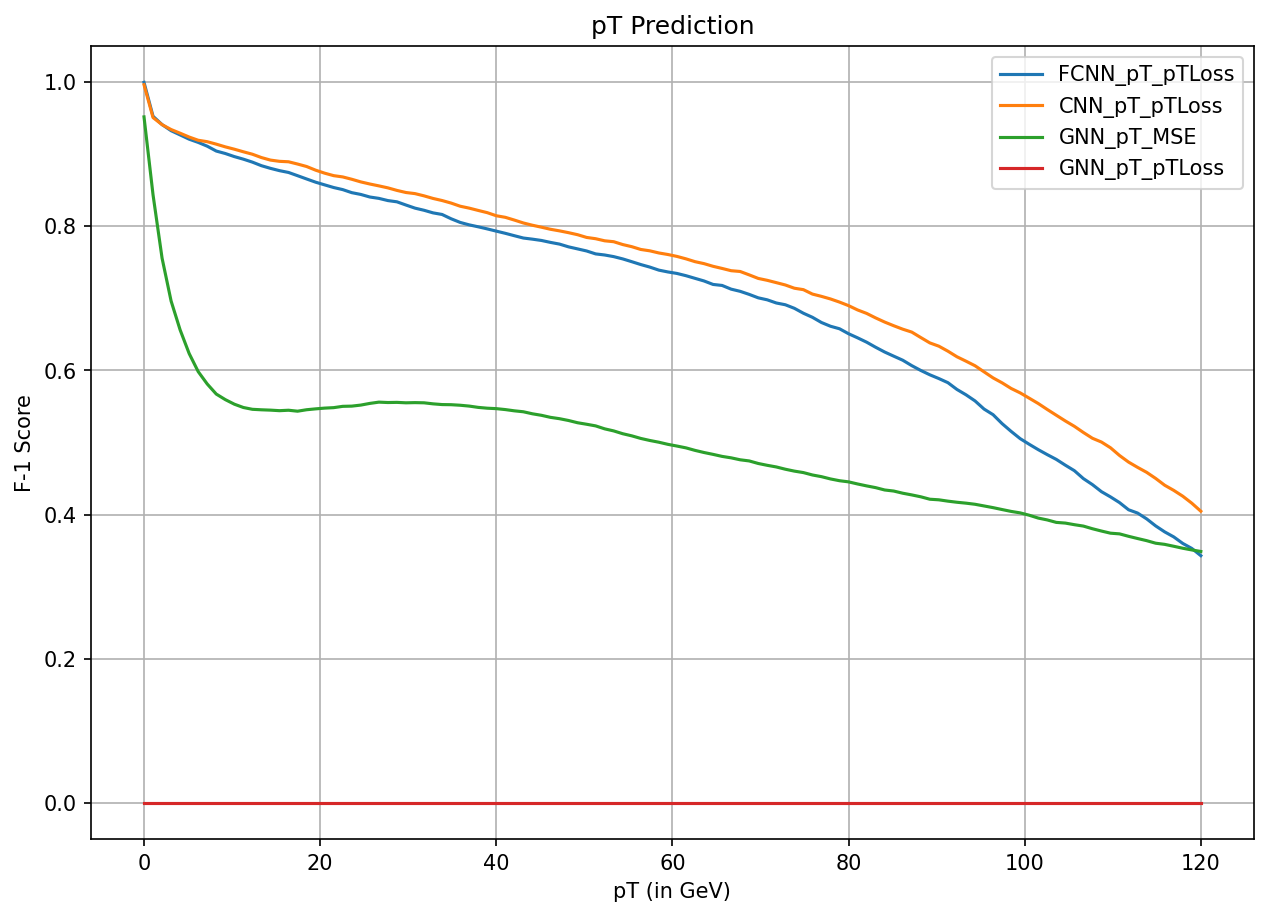

In [68]:
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,f1_fcnn_pT_ptloss, label = 'FCNN_pT_pTLoss')
axs.plot(pev_axis,f1_cnn_pT_ptloss, label = 'CNN_pT_pTLoss')
axs.plot(pev_axis,f1_gnn_pT_mse, label = 'GNN_pT_MSE')
axs.plot(pev_axis,f1_gnn_pT_ptloss, label = 'GNN_pT_pTLoss')
axs.set_xlabel('pT (in GeV)')
axs.set_ylabel('F-1 Score')
fig.set_dpi(150)
axs.legend()
axs.grid(which='both')
# axs.set_ylim([-0.01,0.05])
axs.set_title('pT Prediction')

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

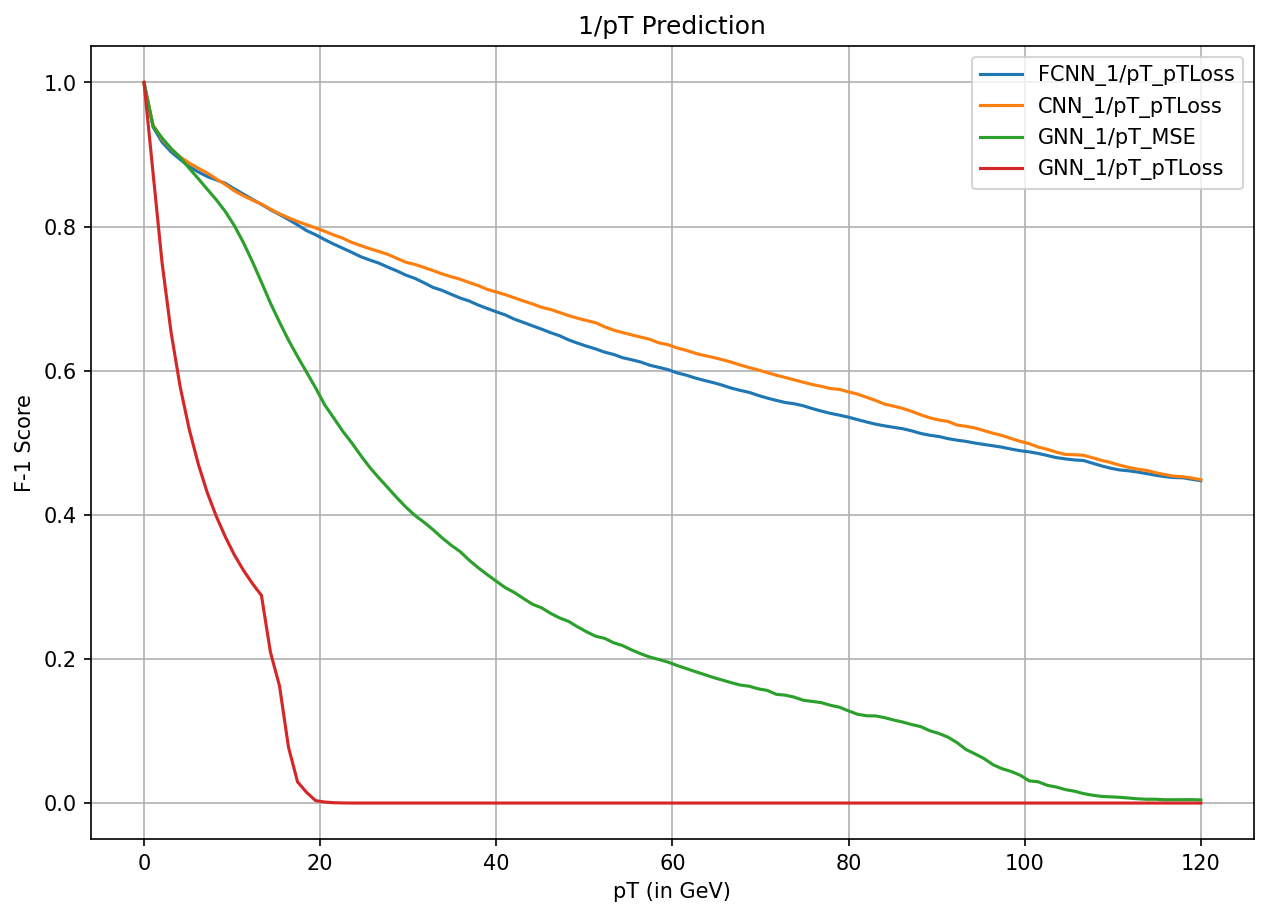

In [69]:
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,f1_fcnn_inv_ptloss, label = 'FCNN_1/pT_pTLoss')
axs.plot(pev_axis,f1_cnn_inv_ptloss, label = 'CNN_1/pT_pTLoss')
axs.plot(pev_axis,f1_gnn_inv_mse, label = 'GNN_1/pT_MSE')
axs.plot(pev_axis,f1_gnn_inv_ptloss, label = 'GNN_1/pT_pTLoss')
axs.set_xlabel('pT (in GeV)')
axs.set_ylabel('F-1 Score')
fig.set_dpi(150)
axs.legend()
axs.grid(which='both')
# axs.set_ylim([-0.01,0.05])
axs.set_title('1/pT Prediction')

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()